In [1]:
Why an algorithm counts from 1 to 1000

SyntaxError: invalid syntax (3218353445.py, line 1)

In [1]:
!pip install qiskit==0.45.1
!pip install qiskit-nature==0.7.1
!pip install pyscf
!pip install --upgrade pyscf
!pip install pylatexenc
!pip install qiskit-aer==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl

In [4]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
# from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper
from qiskit_nature.second_q.circuit.library import UCC,UCCSD, HartreeFock
from qiskit_nature.second_q.algorithms.initial_points import HFInitialPoint

#from qiskit.providers.aer import AerSimulator

from qiskit.utils import QuantumInstance
from qiskit import qpy

from qiskit import transpile

In [ ]:
from qiskit_algorithms.optimizers import SLSQP, NELDER_MEAD, SPSA, L_BFGS_B, P_BFGS, GradientDescent, ADAM, SPSA
from qiskit_algorithms.eigensolvers import VQD
from qiskit_algorithms.state_fidelities import ComputeUncompute, BaseStateFidelity
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit import Aer

# GA-VQE

In [12]:
import json

f5 = open(f"./4qubits_10points_8circuits_5depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data5 = json.loads(f5.read())

f6 = open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data6 = json.loads(f6.read())

f7 = open(f"./4qubits_10points_8circuits_7depth_20generations_VQE_H2_sto6g_fitness_2024-1-23_1000/metadata.json", "r")
data7 = json.loads(f7.read())

f8 = open(f"./4qubits_10points_8circuits_8depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data8 = json.loads(f8.read())

f9 = open(f"./4qubits_10points_8circuits_9depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/metadata.json", "r")
data9 = json.loads(f9.read())

data = [data5["best_fitnesss"], data6["best_fitnesss"], data7["best_fitnesss"], data8["best_fitnesss"], data9["best_fitnesss"]]

with open(f"./4qubits_10points_8circuits_5depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz5 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz6 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_7depth_20generations_VQE_H2_sto6g_fitness_2024-1-23_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz7 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_8depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz8 = qpy.load(qpy_file_read)[0]

with open(f"./4qubits_10points_8circuits_9depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz9 = qpy.load(qpy_file_read)[0]

parameter = [ansatz5.num_parameters, ansatz6.num_parameters, ansatz7.num_parameters, ansatz8.num_parameters, ansatz9.num_parameters]

best_ansatz = [ansatz5, ansatz6, ansatz7, ansatz8, ansatz9]

best_ansatz_transpile = []

for quantum_circuit in best_ansatz:
    best_ansatz_transpile.append(transpile(quantum_circuit, basis_gates=['h', 'cx', 'rx', 'ry', 'rz']))#, 'crx', 'cry', 'crz']))

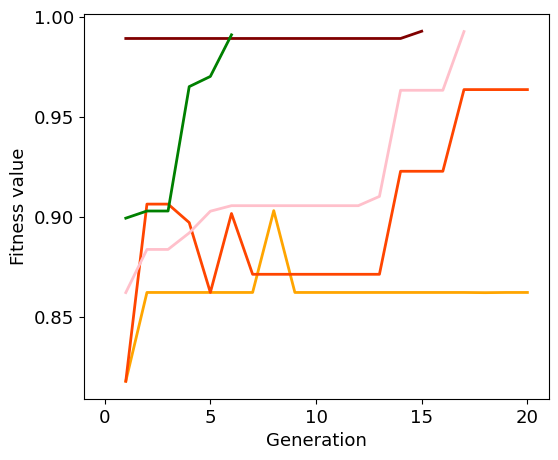

In [27]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(6,5))

fontsize = 13
# plt.yscale(;)

# plt.grid()
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Fitness value", fontsize=13)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim(-1,21)
plt.locator_params(axis="both", nbins=5)

plt.plot(np.linspace(1,len(data5["best_fitnesss"]),len(data5["best_fitnesss"])), data5["best_fitnesss"], linewidth=2, label='5-depth', color='orange')
plt.plot(np.linspace(1,len(data6["best_fitnesss"]),len(data6["best_fitnesss"])), data6["best_fitnesss"], linewidth=2, label='6-depth', color='maroon')
plt.plot(np.linspace(1,len(data7["best_fitnesss"]), len(data7["best_fitnesss"])), data7["best_fitnesss"], linewidth=2, label='7-depth', color='orangered')
plt.plot(np.linspace(1,len(data8["best_fitnesss"]), len(data8["best_fitnesss"])), data8["best_fitnesss"], linewidth=2, label='8-depth', color='pink')
plt.plot(np.linspace(1,len(data9["best_fitnesss"]), len(data9["best_fitnesss"])), data9["best_fitnesss"], linewidth=2, label='9-depth', color="green")
# plt.savefig('Fitness_generation_H2.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.2),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize-1)
# plt.plot()
plt.savefig('GA-VQE_H2_fitness_multi-depth.svg', format='svg', dpi=600, bbox_inches='tight')

In [ ]:
len(np.linspace(1,len(data5["best_fitnesss"]), len(data5["best_fitnesss"])))

20

In [25]:
UCC_fitness = [0.9997748207559525]
UCC_parameters = [3]
UCC_depth = 74

last_data = []

for i in range(len(data)):
    last_data.append(data[i][-1])

summary_data = last_data + UCC_fitness
summary_parameters = parameter + UCC_parameters

depth = []

for qc in best_ansatz_transpile:
    depth.append(qc.depth())

depth.append(UCC_depth)

color = ['orange', 'maroon', 'orangered', 'pink', 'green', 'teal']

label = []

for i in range(len(best_ansatz_transpile)):
    label.append(f"{depth[i]}-depth")

label.append("UCCSD-1trotter")

In [22]:
depth

[15, 20, 18, 25, 24, 74]

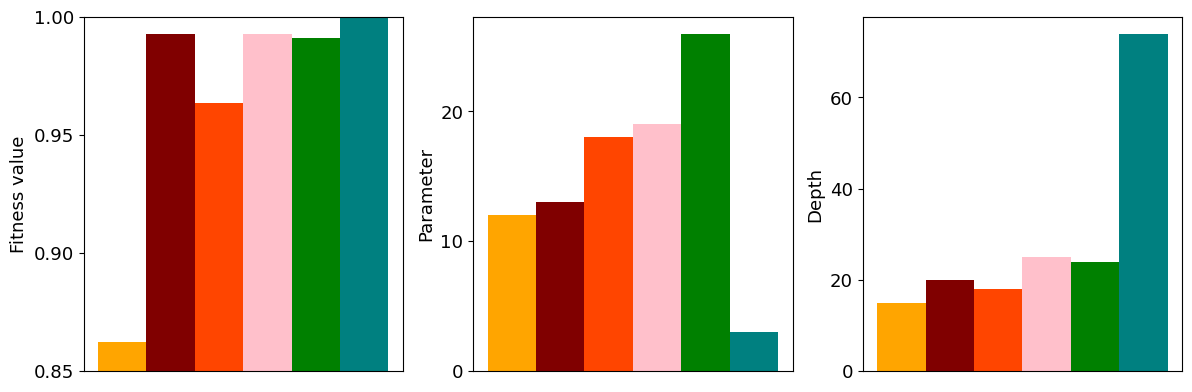

In [26]:
import numpy as np
import matplotlib.pyplot as plt

fontsize=13

# set width of bar
barWidth = 0.1
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]}, figsize=(12,4))

# set height of bar


# Set position of bar on X axis
br0 = []

br0.append(np.arange(1))
for i in range(len(summary_data)-1):
	br0.append([x + barWidth for x in br0[-1]] )

# Make the plot
for i in range(len(summary_data)):
	a0.bar(br0[i], summary_data[i], color =color[i], width = barWidth,
			label =label[i])

a0.set_ylabel('Fitness value', fontsize = 13)

a0.set_ylim(0.85,1.00)
a0.locator_params(axis="y", nbins=5)
# a0.legend(loc='upper center' ,bbox_to_anchor=(2.5 ,1.7),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize)
a0.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=False)


br1 = []

br1.append(np.arange(1))
for i in range(len(summary_parameters)-1):
	br1.append([x + barWidth for x in br1[-1]] )

# Make the plot
for i in range(len(summary_parameters)):
	a1.bar(br1[i], summary_parameters[i], color =color[i], width = barWidth,
			label =label[i])

a1.set_ylabel("Parameter", fontsize=fontsize)

a1.locator_params(axis="y", nbins=5)
a1.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=False)
# a1.legend(loc='upper center' ,bbox_to_anchor=(1.0 ,1.2),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize)

br2 = []

br2.append(np.arange(1))
for i in range(len(depth)-1):
	br2.append([x + barWidth for x in br2[-1]] )

# Make the plot
for i in range(len(depth)):
	a2.bar(br2[i], depth[i], color =color[i], width = barWidth,
			label =label[i])

a2.set_ylabel("Depth", fontsize=fontsize)

a2.locator_params(axis="y", nbins=5)
a2.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=False)

plt.tight_layout(pad=1)

fig.savefig('GA-VQE_H2_fitness-depth.svg', format='svg', dpi=600, bbox_inches='tight')


In [ ]:
with open(f"./4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000/best_circuit.qpy", "rb") as qpy_file_read:
    ansatz = qpy.load(qpy_file_read)[0]

ansatz.draw("mpl").savefig("best_circuit_6depth.svg", bbox_inches='tight')
# ansatz.draw("mpl")

/home/user/.local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Optimized the VQE for Hydrogen atom with different ansatz depth from GA-VQE

In [ ]:
optimize_energy = [[] for _ in range(5,10)]

from qiskit.algorithms.optimizers import COBYLA, NELDER_MEAD
import numpy as np
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
# from qiskit_algorithms import VQE
from qiskit import qpy
import json

basis_set = 'sto6g'

distance = np.linspace(0.25,2.5,10)

# seeds = np.arange(1,32)
seeds = [50]


for num_depth in range(len(optimize_energy)):

    #ansatz = best_ansatz[num_depth]

    for i, dis in enumerate(distance):
      for j, seed in enumerate(seeds):
        interation = 1000

        # file = open(f'result_H2-modify_{seed}.txt', 'w')
        theta = dis
        driver = PySCFDriver(
            # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
            # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
            atom = f"H 0 0 0; H 0 0 {dis}",
            basis= basis_set,
            charge=0,
            spin=0,
            unit=DistanceUnit.ANGSTROM,
        )

        problem = driver.run()
        hamiltonian = problem.hamiltonian
        nuc = hamiltonian.nuclear_repulsion_energy
        hamiltonian = hamiltonian.second_q_op()

        mapper = JordanWignerMapper()

        qubit_op = mapper.map(hamiltonian)



        counts = []
        values = []
        steps = []

        def callback(eval_count, params, value, meta):
            counts.append(eval_count)
            values.append(value)
            # steps.append(step)


        # optimizer = NELDER_MEAD(maxiter=100)
        optimizer = COBYLA(maxiter=1000)
        #optimizer = SLSQP(maxiter=interation)
        # optimizer = GradientDescent(maxiter=100, learning_rate=0.01)
        # optimizer = SPSA(maxiter=5000, learning_rate=0.001, perturbation=0.001)
        # optimizer = ADAM(maxiter=2000, tol=1e-06, lr=seed*0.001, beta_1=0.9, beta_2=0.99)

        # optimizer = SLSQP(maxiter=40)

        # optimizer = COBYLA(maxiter=500)

        algorithm_globals.random_seed = seed
        estimator = Estimator()


        ansatz = UCC(num_spatial_orbitals = problem.num_spatial_orbitals,
                     num_particles = [problem.num_alpha, problem.num_beta],
                     excitations='sd',
                     reps = 1,
                     qubit_mapper= mapper,
                     initial_state = HartreeFock(num_spatial_orbitals = problem.num_spatial_orbitals,
                     num_particles = [problem.num_alpha, problem.num_beta],
                     qubit_mapper= mapper,
                     ),
                     )

        vqe = VQE(estimator = estimator, ansatz = ansatz, optimizer=optimizer, callback=callback)
        result1 = vqe.compute_minimum_eigenvalue(qubit_op)
        result = result1.eigenvalue.real + nuc

        # optimize_energy[num_depth].append(result)

        print(optimize_energy[num_depth])
        # print(result1.optimal_parameters)
        # print(result1.optimal_point)
        # print(result1.optimal_circuit)
        # print(result)


In [19]:
optimize_energy = np.array([[-0.3170197267869357, -1.0531879359716443, -1.1247307414352847, -1.0735829230773248, -1.0018392682420223, -0.966335114051448, -0.9519822378668659, -0.9460970610495303, -0.9436188290962979, -0.9424808144315895], [-0.3188786888360151, -1.0617551765451274, -1.1414272587185095, -1.1044890924718591, -1.0493304444500269, -1.0065225434202114, -0.9752450632653955, -0.9576583535723231, -0.9489554023840963, -0.9449905886488805], [-0.3171509371374208, -1.0577103837378796, -1.138600698432973, -1.0916968490288164, -1.053434047979322, -1.0065628602952996, -0.9752414070882343, -0.9571410839209367, -0.9382480643670978, -0.940446409664434], [-0.3170203599614996, -1.0531857623465368, -1.1358352063195256, -1.073575416080399, -1.053169662028648, -1.0063161587418215, -0.9732988401431855, -0.9569422496797286, -0.9436759156906223, -0.9426848755848909], [-0.31701973040195286, -1.0531879364860812, -1.1247307449512949, -1.1052440594220894, -1.0532749983848881, -1.0062557559845693, -0.97488829445682, -0.9551746123677409, -0.9383353842219819, -0.9404429105077112]])

In [18]:
UCC_energy = np.array([-0.32395731783663395, -1.0653851661758076, -1.1457416672628145, -1.1088730573078833, -1.0534347931450685, -1.0065628703810692, -0.975245066240549, -0.9576582677523044, -0.9489552064926057, -0.944977227809821])

In [20]:
exact_FCI_compared = np.array([-0.32395732733981086, -1.0652712850213713, -1.1457485513050538, -1.1089533803595886, -1.0535416676577212, -1.0064842417370856, -0.975209498649281, -0.9576460346829758, -0.9489525154062417, -0.9449905903101949])

In [ ]:
UCC_fitness = np.mean(np.exp(-5*np.abs(exact_FCI_compared - UCC_energy)))
print(UCC_fitness)

0.9997748207559525


C:\Users\DELL\AppData\Local\Temp\ipykernel_14876\827834510.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  a0.plot(distance, UCC_energy, ".", marker='s', label="UCCSD-1trotter", markersize=5, linewidth=1.5, color='teal')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14876\827834510.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  a0.plot(distance, optimize_energy[0], ".", marker='s', label = label[0], markersize = 3, alpha = 0.8, color="orange")
C:\Users\DELL\AppData\Local\Temp\ipykernel_14876\827834510.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  a0.plot(distance, optimize_energy[1], ".", marker='s', label = label[1], markersize = 3

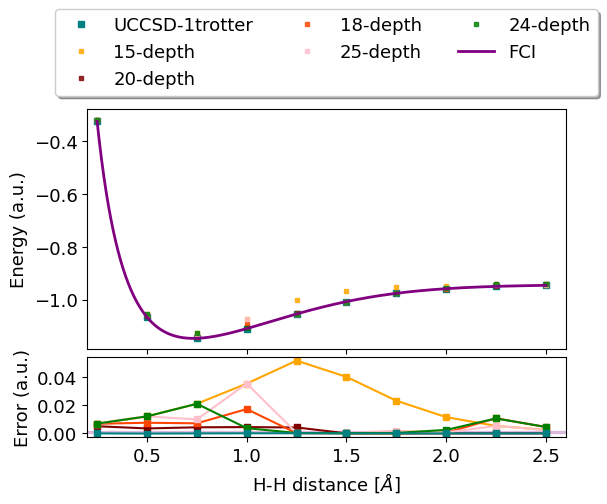

In [29]:
import matplotlib.pyplot as plt
# plt.plot(distance, data['energy'])
file = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

distance = np.linspace(0.25,2.5,10)

fontsize = 13
exact_FCI = []

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6,5))

for i in range(len(file)):
  exact_FCI.append(eval(file[i].split(' ')[-2]))


distance2 = np.linspace(0.25, 2.5, 2000)

# a0.grid()
a0.plot(distance, UCC_energy, ".", marker='s', label="UCCSD-1trotter", markersize=5, linewidth=1.5, color='teal')
a0.plot(distance, optimize_energy[0], ".", marker='s', label = label[0], markersize = 3, alpha = 0.8, color="orange")
a0.plot(distance, optimize_energy[1], ".", marker='s', label = label[1], markersize = 3, alpha = 0.8, color="maroon")
a0.plot(distance, optimize_energy[2], ".", marker='s', label = label[2], markersize = 3, alpha = 0.8, color="orangered")
a0.plot(distance, optimize_energy[3], ".", marker='s', label = label[3], markersize = 3, alpha = 0.8, color="pink")
a0.plot(distance, optimize_energy[4], ".", marker='s', label = label[4], markersize = 3, alpha = 0.8, color="green")

a0.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
a0.legend(loc='upper center' ,bbox_to_anchor=(0.5 ,1.45),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize)
a0.set_ylabel('Energy (a.u.)', fontsize=fontsize)
a0.locator_params(axis="both", nbins=5)
a0.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=True)
a0.set_xlim((0.2, 2.6))
exact_FCI_compared = []

for i in range(len(distance)):
  exact_FCI_compared.append(eval(file[int(np.round((distance[i]-0.25)/((2.5-0.25)/1999)))].split(" ")[-2]))


absolute_error = [abs(np.array(exact_FCI_compared) - np.array(optimize_energy[i])) for i in range(5)]

# a1.grid()
a1.plot(distance, absolute_error[0], "s-", marker='s', markersize=5, linewidth=1.5, color="orange")
a1.plot(distance, absolute_error[1], "s-", marker='s', markersize=5, linewidth=1.5, color="maroon")
a1.plot(distance, absolute_error[2], "s-", marker='s', markersize=5, linewidth=1.5, color="orangered")
a1.plot(distance, absolute_error[3], "s-", marker='s', markersize=5, linewidth=1.5, color="pink")
a1.plot(distance, absolute_error[4], "s-", marker='s', markersize=5, linewidth=1.5, color="green")
a1.plot(distance, UCC_energy-exact_FCI_compared, "s-", marker='s', markersize=5, linewidth=1.5, color='teal')
length = np.linspace(0.1,2.6,10)

#a1.set_yscale(('log'))
a1.set_xlim((0.2, 2.6))
# a1.set_ylim((0, 0.006))
a1.locator_params(axis="both", nbins=5)
a1.tick_params(axis="both", labelsize=fontsize, bottom=True)
a1.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.2, label='Training interval')
a1.set_ylabel('Error (a.u.)', fontsize = fontsize)
a1.set_xlabel(r'H-H distance [$\AA$]', fontsize=fontsize)

plt.tight_layout(pad=0.2)

fig.savefig('GA-VQE_H2_PES_multi-depth.svg', format='svg', dpi=600, bbox_inches='tight')

# NN-VQE

Collect data to train

In [12]:
from qiskit.algorithms.optimizers import COBYLA, NELDER_MEAD
import numpy as np
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
# from qiskit_algorithms import VQE
from qiskit import qpy
import json

basis_set = 'sto6g'

distance = np.array(list(np.linspace(0.6, 0.8, 10)) + list(np.linspace(1.4, 1.6 , 10)) + list(np.linspace(2, 2.2, 10)))

VQE_with_bestcircuit_GAQAS = []

# seeds = np.arange(1,32)
seeds = [50]
data = {'distance': [], 'thetas': [], 'energy': []}



for i, dis in enumerate(distance):
  for j, seed in enumerate(seeds):
    interation = 100

    # file = open(f'result_H2-modify_{seed}.txt', 'w')
    theta = dis
    driver = PySCFDriver(
        # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
        # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
        atom = f"H 0 0 0; H 0 0 {dis}",
        basis= basis_set,
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )

    problem = driver.run()
    hamiltonian = problem.hamiltonian
    nuc = hamiltonian.nuclear_repulsion_energy
    hamiltonian = hamiltonian.second_q_op()

    mapper = JordanWignerMapper()

    qubit_op = mapper.map(hamiltonian)


    with open(f"best_circuit_4qubits_10points_8circuits_6depth_20generations_VQE_H2_sto6g_fitness_2024-1-17_1000.qpy", "rb") as qpy_file_read:
        ansatz = qpy.load(qpy_file_read)[0]


    counts = []
    values = []
    steps = []

    def callback(eval_count, params, value, meta):
        counts.append(eval_count)
        values.append(value)
        # steps.append(step)


    # optimizer = NELDER_MEAD(maxiter=100)
    # optimizer = COBYLA(maxiter=1000)
    optimizer = SLSQP(maxiter=interation)
    # optimizer = GradientDescent(maxiter=100, learning_rate=0.01)
    # optimizer = SPSA(maxiter=5000, learning_rate=0.001, perturbation=0.001)
    # optimizer = ADAM(maxiter=2000, tol=1e-06, lr=seed*0.001, beta_1=0.9, beta_2=0.99)

    # optimizer = SLSQP(maxiter=40)

    # optimizer = COBYLA(maxiter=500)

    algorithm_globals.random_seed = seed
    estimator = Estimator()

    vqe = VQE(estimator = estimator, ansatz = ansatz, optimizer=optimizer, callback=callback)
    result1 = vqe.compute_minimum_eigenvalue(qubit_op)
    result = result1.eigenvalue.real + nuc
    VQE_with_bestcircuit_GAQAS.append(result)
    data['distance'].append(float(dis))
    data['thetas'].append(list(result1.optimal_point))
    data['energy'].append(float(result))
    print(data['energy'])
    # print(result1.optimal_parameters)
    # print(result1.optimal_point)
    # print(result1.optimal_circuit)
    # print(result)

# Save data
with open(f"data_many-sample_60_1.json", "w") as outfile:
  json.dump(data, outfile)

[-1.1255961745763885]
[-1.1255961745763885, -1.132557033991016]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151, -1.1441466253493147]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151, -1.1441466253493147, -1.1455502607424362]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151, -1.1441466253493147, -1.1455502607424362, -1.145979891907162]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151, -1.1441466253493147, -1.1455502607424362, -1.145979891907162, -1.1455640483480671]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151, -1.1441466253493147, -1.1455502607424362, -1.145979891907162, -1.1455640483480671, -1.144409140167748]
[-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -

In [14]:
data = {'distance': [0.6, 0.6222222222222222, 0.6444444444444445, 0.6666666666666666, 0.6888888888888889, 0.7111111111111111, 0.7333333333333334, 0.7555555555555555, 0.7777777777777778, 0.8, 1.4, 1.422222222222222, 1.4444444444444444, 1.4666666666666666, 1.488888888888889, 1.511111111111111, 1.5333333333333334, 1.5555555555555556, 1.577777777777778, 1.6, 2.0, 2.022222222222222, 2.0444444444444443, 2.066666666666667, 2.088888888888889, 2.111111111111111, 2.1333333333333333, 2.155555555555556, 2.177777777777778, 2.2], 'thetas': [[3.6118600692240768, 3.3182758658304796, -0.00011294699092756484, 5.949536809130025, -3.1548879441546998, 1.8462931831829383, -6.283371980583302, 1.5731199774369, -3.00704402215371, -2.788809588340301, 4.712649149016913, -3.129811442475748, -0.0006225965494048218], [3.611860069224077, 3.322008834488126, -2.3086718830779354e-05, 5.9495368091300245, -3.150670926470256, 1.8462931831829386, -6.283223689349881, 1.5693783202726101, -3.0108498682218063, -2.7845985937898297, 4.712522389587488, -3.1295390761935487, 6.421021793178426e-05], [3.6118600692240777, 3.325740713015554, -4.649486358317785e-05, 5.949536809130025, -3.1486084842011777, 1.8462931831829383, -6.283222731043911, 1.5656239979805404, -3.0521479252549955, -2.7825126433016827, 4.712529689278181, -3.1328894496070507, 5.993344724901428e-05], [3.6118600692240777, 3.32961304305713, 3.0308972347698894e-05, 5.949536809130025, -3.1476438609480266, 1.8462931831829386, -6.283144821269534, 1.5618055070699628, -3.1133489765104465, -2.78155935298522, 4.712426661682931, -3.1386106735493837, 1.1182835797460296e-05], [3.611860069224077, 3.3333343428271083, -0.0001706140800631227, 5.949536809130025, -3.142193429016217, 1.8462931831829383, -6.283214420231277, 1.5580426945821464, -3.0974068537826955, -2.7760945694737518, 4.712534209115969, -3.1367897206064916, -0.00016818704641879145], [3.6118600692240768, 3.3377597398598384, 0.00010329812962325398, 5.949536809130025, -3.1417229033863947, 1.8462931831829383, -6.283077230261108, 1.553621381742813, -3.1115071546299196, -2.7756385064793685, 4.712260272699851, -3.138539366935982, 3.4216471393443755e-05], [3.6118600692240768, 3.3423511486220354, -3.0216454272099602e-05, 5.949536809130025, -3.1404307950098977, 1.8462931831829381, -6.283021342826375, 1.5489968640302363, -3.0392186826117595, -2.77434617317274, 4.712523755526365, -3.129581072217786, -0.00015998192278901606], [3.611860069224077, 3.347182550497389, 9.166174420045551e-05, 5.949536809130025, -3.1395582543381537, 1.8462931831829381, -6.282938699661774, 1.5442353345150654, -3.1027324424000167, -2.7734732583927455, 4.712088163410482, -3.1370431650351476, -0.0007380948800949335], [3.6118600692240777, 3.351576244426778, -0.0002760604215167699, 5.949536809130025, -3.142989989092581, 1.8462931831829383, -6.28355083300519, 1.5398367085799263, -3.1205748122768546, -2.776899079648171, 4.712664691553545, -3.138842961626506, 0.00026264337392212906], [3.611860069224077, 3.3566723575188, -0.00011664151030682209, 5.949536809130025, -3.146776419099693, 1.8462931831829386, -6.283138154744902, 1.5347540571326306, -3.1289251160934617, -2.7807015741872387, 4.712428705994585, -3.140123886758148, -0.00026458984147116886], [3.611860069224077, 3.5528278852692488, 0.0006757449084907707, 5.949536809130025, -2.964600871347727, 1.8462931831829383, -6.283373343734863, 1.3385888385667737, -3.137450128724183, -2.598511744187903, 4.712449829510159, -3.1397805614617194, 0.0009315583177789855], [3.611860069224077, 3.5619568513436506, 0.00043146026036112865, 5.949536809130025, -2.95091202947866, 1.8462931831829383, -6.283179836408221, 1.3294600358785882, -3.1380213589261956, -2.5848253787742084, 4.712079291188181, -3.1405835727241787, 0.0012788886897142143], [3.6118600692240763, 3.5717797007703416, 0.0004459372260556771, 5.949536809130025, -2.9395418107850015, 1.8462931831829383, -6.283364811164658, 1.3196355028920905, -3.1371218203292996, -2.5734546429996037, 4.712293580033472, -3.140205703990726, 0.0006306290357328702], [3.6118600692240777, 3.580938880877269, 0.0003456551974835902, 5.949536809130025, -2.9259952404428873, 1.8462931831829383, -6.283237854636468, 1.3104757071667994, -3.1396889584633407, -2.5599116791909418, 4.712178702803783, -3.140951144428558, 0.00099504227391995], [3.611860069224077, 3.590763019021943, 0.000862396767310797, 5.949536809130025, -2.911255316261144, 1.8462931831829383, -6.283389018716706, 1.3006587111128325, -3.1320274197920823, -2.5451694391251904, 4.712331572015579, -3.1381714108219705, 0.0012555109487224284], [3.6118600692240768, 3.600187030676698, 0.00023855911803955562, 5.949536809130025, -2.8946111216449943, 1.8462931831829383, -6.28320973520284, 1.291232951927288, -3.14043886787835, -2.528526496592677, 4.71231576584736, -3.1412346812756082, 0.0008364836398274487], [3.611860069224077, 3.6098015303960604, 0.0005942777941049565, 5.949536809130025, -2.892613630419561, 1.8462931831829383, -6.283187076670417, 1.2816262734057555, -3.13708800984117, -2.5265281530040458, 4.712318787362579, -3.1399586642210076, 0.0012633008994034165], [3.611860069224077, 3.619453520988018, 0.0005837333190246997, 5.949536809130025, -2.8973787818869146, 1.8462931831829383, -6.283122156720462, 1.271962079601699, -3.1420379717042994, -2.531289825624677, 4.712295591678953, -3.142216592577246, 0.0015622560768186315], [3.611860069224077, 3.629286117464788, 0.0005004987946353938, 5.949536809130025, -2.880784175476143, 1.8462931831829383, -6.2835218589558774, 1.2621309647029473, -3.1341725534902145, -2.514701479765532, 4.712984404357493, -3.1391028424831546, -0.0007401941153873607], [3.611860069224077, 3.63879580024367, 0.00016821098347760433, 5.949536809130025, -2.875417218359757, 1.8462931831829383, -6.283096773790216, 1.2526237059277077, -3.1397231536409635, -2.509327229301068, 4.712331914003061, -3.140912843343143, 0.00041679827792467363], [3.611860069224077, 3.7967583187279708, 0.00011892164266859772, 5.949536809130025, -2.7530609512487554, 1.8462931831829383, -6.284031019829791, 1.0946609968067311, -3.1424197249157215, -2.3869740263362704, 4.712392308417595, -3.1408751469577436, 0.0003520107073972026], [3.611860069224077, 3.8040300157913385, -0.0009236044196804061, 5.949536809130025, -2.7608627991583563, 1.8462931831829383, -6.2834773817234915, 1.087389978356489, -3.143736403560394, -2.3947764052994147, 4.712451176994832, -3.1421662052786417, -0.0012588627811302953], [3.611860069224077, 3.811327223779951, -0.00015263416419058205, 5.949536809130025, -2.7552388755488253, 1.8462931831829383, -6.283237447543425, 1.0800959318996404, -3.1420557332536756, -2.3891517482598914, 4.712394211454646, -3.141751970214384, -0.000483509435704028], [3.611860069224077, 3.818139912273279, 0.0005050766122087839, 5.949536809130025, -2.754716827113832, 1.8462931831829383, -6.283646919791269, 1.073281061247278, -3.1429284089713425, -2.3886307228335526, 4.712177073594376, -3.1419662998474664, 0.0005566013575137229], [3.611860069224077, 3.8251000437704734, 0.000567483727802942, 5.949536809130025, -2.753342020947112, 1.8462931831829383, -6.282981393902635, 1.0663186729399265, -3.14193985987191, -2.3872551945075147, 4.71287567428047, -3.1413602000740837, 0.000620774660031522], [3.611860069224077, 3.8317739731371017, -0.00011812503536551982, 5.949536809130025, -2.7578214736311946, 1.8462931831829383, -6.282895523263183, 1.059646706905641, -3.141708296046091, -2.3917356654508124, 4.712786705787522, -3.1417217024294426, 0.00017590544509096684], [3.611860069224077, 3.8382611830802302, -0.0004961861497326978, 5.949536809130025, -2.766392377569629, 1.8462931831829383, -6.283708666969687, 1.0531587993954676, -3.141896202023794, -2.400305267300252, 4.712529899263486, -3.141528712590485, -0.0005138463110108245], [3.611860069224077, 3.8442358811670556, -0.0007280366539428882, 5.949536809130025, -2.7823310915752884, 1.8462931831829383, -6.285632108693008, 1.0471856072907428, -3.141640980896621, -2.4162436612131892, 4.712936283825595, -3.140902468955448, -0.001323155081759953], [3.6118600692240777, 3.8505374061799804, -0.0005988181308687968, 5.949536809130025, -2.7860520928004755, 1.8462931831829383, -6.284746219268378, 1.0408826009553744, -3.1417374984755777, -2.4199647003828995, 4.7128491773510435, -3.1411459770961496, -0.0008568263438607079], [3.611860069224077, 3.8565605397688056, 0.00023342473452367637, 5.949536809130025, -2.7865376890774924, 1.8462931831829383, -6.283796311343885, 1.0348611423137397, -3.1411807400675973, -2.4204496192954346, 4.713885679737931, -3.1417010605699653, -0.00020509351857727902]], 'energy': [-1.1255961745763885, -1.132557033991016, -1.1378278016692829, -1.141628018345151, -1.1441466253493147, -1.1455502607424362, -1.145979891907162, -1.1455640483480671, -1.144409140167748, -1.1426131198357743, -1.0235687479944728, -1.0195720744569026, -1.0156978417162201, -1.0119485821532224, -1.008325661312331, -1.004831704205903, -1.001465955602001, -0.9982293602767448, -0.9951211158214999, -0.9921416105070362, -0.957657905564723, -0.9565969254899862, -0.9556019133609892, -0.9546690795158432, -0.9537956533385779, -0.9529782817260202, -0.952213749496702, -0.9514983208700987, -0.9508314004049687, -0.9502083611130083]}

Text(0.5, 0, 'H-H distance [$\\AA$]')

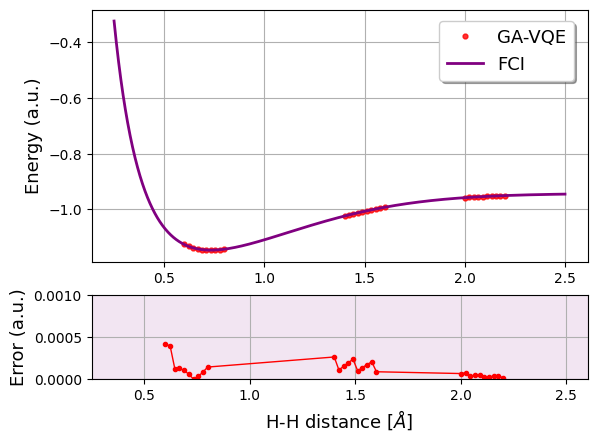

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(distance, data['energy'])
file = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

fontsize = 13
exact_FCI = []

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

for i in range(len(file)):
  exact_FCI.append(eval(file[i].split(' ')[-2]))


distance2 = np.linspace(0.25, 2.5, 2000)

a0.grid()
a0.plot(distance, data['energy'], "r.", label = "GA-VQE", markersize = 7, alpha = 0.8)
a0.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
a0.legend(loc='upper right' ,bbox_to_anchor=(0.99, 0.99),  ncol=1, fancybox=True, shadow=True, fontsize=fontsize)
a0.set_ylabel('Energy (a.u.)', fontsize=fontsize)

exact_FCI_compared = []

for i in range(len(distance)):
  exact_FCI_compared.append(eval(file[int(np.round((distance[i]-0.25)/((2.5-0.25)/1999)) + 1)].split(" ")[-2]))


absolute_error = abs(np.array(exact_FCI_compared) - np.array(data["energy"]))

a1.grid()
a1.plot(distance, absolute_error, "o-", color = 'red', markersize=3, linewidth=1)
length = np.linspace(0.1,2.6,10)

a1.set_ylim((0, 0.001))
a1.set_xlim((0.25, 2.6))

a1.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.1, label='Training interval')
a1.set_ylabel('Error (a.u.)', fontsize = fontsize)
a1.set_xlabel(r'H-H distance [$\AA$]', fontsize=fontsize)


Import data

In [ ]:
import json

# Opening JSON file
f = open('./data_many-sample_60_1.json')
# Load data
data = json.load(f)
print(data)

{'distance': [0.6, 0.6222222222222222, 0.6444444444444445, 0.6666666666666666, 0.6888888888888889, 0.7111111111111111, 0.7333333333333334, 0.7555555555555555, 0.7777777777777778, 0.8, 1.4, 1.422222222222222, 1.4444444444444444, 1.4666666666666666, 1.488888888888889, 1.511111111111111, 1.5333333333333334, 1.5555555555555556, 1.577777777777778, 1.6, 2.0, 2.022222222222222, 2.0444444444444443, 2.066666666666667, 2.088888888888889, 2.111111111111111, 2.1333333333333333, 2.155555555555556, 2.177777777777778, 2.2], 'thetas': [[3.611860069224077, 3.31799934142087, 0.00010852342266755519, 5.949536809130025, -3.1567884331561515, 1.8462931831829381, -6.283018925841249, 1.5733851528975795, -3.0632283124935196, -2.79069794739149, 4.712199266922433, -3.1347346776368346, 0.0005661123598735531], [3.611860069224077, 3.32200695109866, -2.6561505983663366e-05, 5.949536809130025, -3.1507579537171804, 1.8462931831829383, -6.283233314760789, 1.5693927978251394, -3.0138617830666177, -2.7846663224363244, 4.7

Train NN model

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# load the dataset, split into input (X) and output (y) variables
# dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = data['distance']
y = data['thetas']

X = torch.tensor(X, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(y, dtype=torch.float32)


# define the model
model = nn.Sequential(
    nn.Linear(1, 9),
    nn.Sigmoid(),
    nn.Linear(9, 11),
    nn.ReLU(),
    nn.Linear(11, 10),
    nn.ReLU(),
    nn.Linear(10, 13)
)
print(model)

# train the model
# loss_fn   = nn.BCELoss()  # binary cross entropy
# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 20000
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
    print(y_pred)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Streaming output truncated to the last 5000 lines.
Finished epoch 15091, latest loss 8.373268792638555e-05
Finished epoch 15092, latest loss 8.373051241505891e-05
Finished epoch 15093, latest loss 8.37261468404904e-05
Finished epoch 15094, latest loss 8.372658339794725e-05
Finished epoch 15095, latest loss 8.372962474822998e-05
Finished epoch 15096, latest loss 8.372947195312008e-05
Finished epoch 15097, latest loss 8.372755837626755e-05
Finished epoch 15098, latest loss 8.372567390324548e-05
Finished epoch 15099, latest loss 8.372718730242923e-05
Finished epoch 15100, latest loss 8.372862066607922e-05
Finished epoch 15101, latest loss 8.372786396648735e-05
Finished epoch 15102, latest loss 8.372534648515284e-05
Finished epoch 15103, latest loss 8.372533920919523e-05
Finished epoch 15104, latest loss 8.372659067390487e-05
Finished epoch 15105, latest loss 8.37279440020211e-05
Finished epoch 15106, latest loss 8.37251209304668e-05
Finished epoch 15107, latest loss 8.372308366233483e-05


Save model

In [ ]:
torch.save(model, './model_H2_many_sample_60_1.pth')

Load model

In [ ]:
import torch
model = torch.load("./model_H2_many_sample_60_1.pth")
model.eval()

Sequential(
  (0): Linear(in_features=1, out_features=9, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=9, out_features=11, bias=True)
  (3): ReLU()
  (4): Linear(in_features=11, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=13, bias=True)
)

In [ ]:
!pip show torch --version

Name: torch
Version: 2.2.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/user/.local/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: 


In [ ]:
from qiskit.primitives import Estimator

number = 100

a = np.linspace(0.25, 2.5, number)
a = torch.tensor(a, dtype=torch.float32).reshape(-1,1)

energy = []

with torch.no_grad():
    y_pred = model(a)

a = np.linspace(0.25, 2.5, number)

with open(f"best_circuit.qpy", "rb") as qpy_file_read:
      ansatz = qpy.load(qpy_file_read)[0]

for dis in range(len(y_pred.numpy())):
  driver = PySCFDriver(
        # atom= f"H 0 {R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)}; H 0 {-R*np.sin(theta/180*np.pi/2)} {R*np.cos(theta/180*np.pi/2)}; H 0 {R*np.sin(theta/180*np.pi/2)} {-R*np.cos(theta/180*np.pi/2)} ",
        # atom = f"H 0 0 0; H 0 0 {dis}; H 0 0 {2*dis}; H 0 0 {3*dis}",
        atom = f"H 0 0 0; H 0 0 {a[dis]}",
        basis= 'sto6g',
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )

  problem = driver.run()
  hamiltonian = problem.hamiltonian
  nuc = hamiltonian.nuclear_repulsion_energy
  hamiltonian = hamiltonian.second_q_op()

  mapper = JordanWignerMapper()


  qubit_op = mapper.map(hamiltonian)

  estimator = Estimator().run(ansatz, qubit_op, y_pred.numpy()[dis])
  energy.append(estimator.result().values[0] + nuc)


In [ ]:
# Estimate energy
energy = np.array([-0.3229772527216248, -0.47079668948115305, -0.5910864638543387, -0.6898236870792003, -0.7714091704920938, -0.8391559290161732, -0.89560594606264, -0.9427418572340294, -0.9821321375696179, -1.0150332594725648, -1.0424629052258227, -1.0652534828688303, -1.084091819144991, -1.0995489685881945, -1.112103023030599, -1.1221566111425005, -1.1300506822729504, -1.1360753504208347, -1.1404785507767987, -1.1434730693000463, -1.1452422045998554, -1.1459444311298008, -1.1457172168380674, -1.14468018299756, -1.1429377210029803, -1.140581156404358, -1.1376906011943841, -1.1343364542696979, -1.1305806851117666, -1.1264779958456066, -1.1220766690261657, -1.1174194129297619, -1.1125440749875142, -1.1074842152736193, -1.102269626050589, -1.0969268227227413, -1.0914793498489896, -1.0859482464730754, -1.080352280662723, -1.074708177318008, -1.0702263532125453, -1.0658976437506804, -1.0614691534978435, -1.056977413664811, -1.0524546846868277, -1.0479292278924768, -1.0434257565316045, -1.0389657163892887, -1.034567552909357, -1.0302470418856733, -1.0260175211526432, -1.0218901242670189, -1.0178740020673644, -1.013976529969759, -1.0102034886621287, -1.006559237321147, -1.0030468709244769, -0.9996683633459333, -0.9964247001945602, -0.9933160009599212, -0.9903416291862217, -0.9875002868200862, -0.984790113579896, -0.9822087679918441, -0.9797534951273785, -0.9774212041094864, -0.9752085265197687, -0.9731118584282688, -0.9711274289432412, -0.9692513247648655, -0.9674795472122039, -0.9658080281426601, -0.9642326682081042, -0.962749368477638, -0.9613540428675467, -0.9600426396416128, -0.9588111661032709, -0.9576556950754227, -0.9565723768149093, -0.9555574541237349, -0.9546072668661953, -0.9537182587606408, -0.9528869833525656, -0.9521101070701837, -0.9513844122212144, -0.950706800743264, -0.9500742897950963, -0.9494840183421965, -0.9489332432079887, -0.9484193352975478, -0.9479397847991047, -0.947492194589281, -0.9470742799890948, -0.9466838665513205, -0.9463188802526815, -0.9459773664116966, -0.9456574559240204, -0.9453573759410384, -0.9450754583720363, -0.944810127510455])

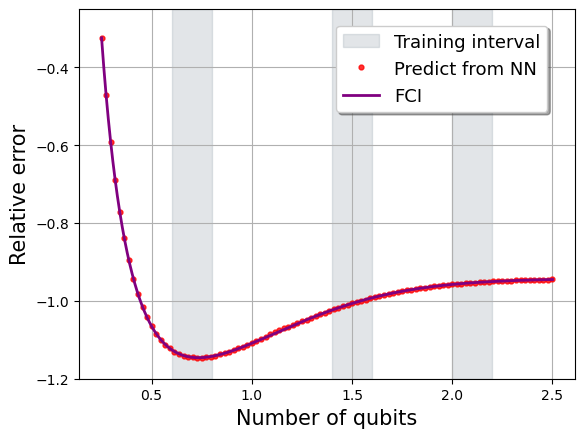

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

number = 100
a = np.linspace(0.25, 2.5, number)

exact_FCI = []
fig, ax = plt.subplots()
# file1 = open('H4-chain-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('H4-square-molecules-sto6g-2000.txt', 'r').readlines()
file1 = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

for i in range(len(file1)):
  exact_FCI.append(eval(file1[i].split(' ')[-2]))

# distance1 = np.linspace(0.5, 1.5, 100)
# distance1 = np.linspace(0.25, 5, 100)
distance2 = np.linspace(0.25, 2.5, 2000)
# distance1 = np.linspace(70, 110, 10)
plt.grid()
# X_input = np.linspace(0.25,2.5,10)
X_input_1 = np.linspace(0.6, 0.8, 10)
X_input_2 = np.linspace(1.4, 1.6 , 10)
X_input_3 = np.linspace(2, 2.2, 10)
plt.fill_between(X_input_1, np.zeros(len(X_input_1))-1.2,np.zeros(len(X_input_1))-0.25, color='slategrey', alpha=.2, label='Training interval')
plt.fill_between(X_input_2, np.zeros(len(X_input_2))-1.2,np.zeros(len(X_input_2))-0.25, color='slategrey', alpha=.2)
plt.fill_between(X_input_3, np.zeros(len(X_input_3))-1.2,np.zeros(len(X_input_3))-0.25, color='slategrey', alpha=.2)
plt.ylim((-1.2,-0.25))
# ax.fill_between(X_input, -0.2, 0., color='orange', alpha=.15, ec=None,
#                     transform=ax.get_xaxis_transform())
# distance2 = np.linspace(70, 110, 2000)
plt.plot(a, energy, "r.", label = "Predict from NN", markersize = 7, alpha = 0.8)
plt.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
plt.ylabel("Energy (a.u.)")
# plt.ylim(-1.91,-1.85)
plt.legend(loc='upper left' ,bbox_to_anchor=(0.5, 0.98),  ncol=1, fancybox=True, shadow=True, fontsize=13)
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Number of qubits', fontsize=15)
fig.savefig('NN-VQE.svg', format='svg', dpi=600, bbox_inches='tight')

# Plot NN-VQE

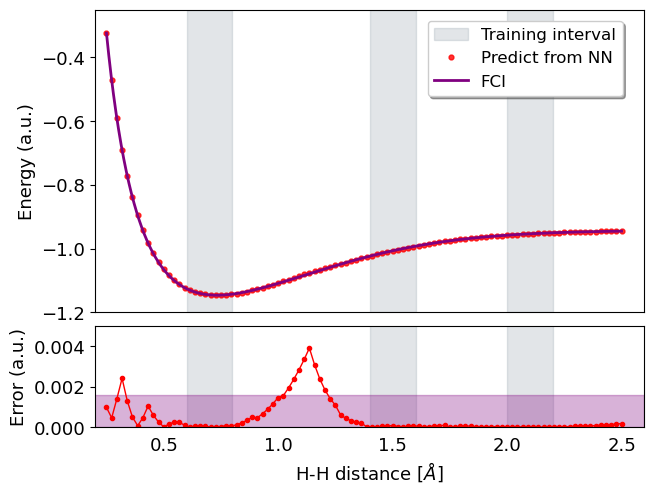

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


fontsize = 13
exact_FCI = []

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
# file1 = open('H4-chain-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('H4-square-molecules-sto6g-2000.txt', 'r').readlines()
file1 = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()
# file1 = open('LiH-molecules-sto6g-2000.txt', 'r').readlines()

for i in range(len(file1)):
  exact_FCI.append(eval(file1[i].split(' ')[-2]))

# distance1 = np.linspace(0.5, 1.5, 100)
# distance1 = np.linspace(0.25, 5, 100)
distance2 = np.linspace(0.25, 2.5, 2000)
# distance1 = np.linspace(70, 110, 10)
# a0.grid()
# X_input = np.linspace(0.25,2.5,10)
X_input_1 = np.linspace(0.6, 0.8, 10)
X_input_2 = np.linspace(1.4, 1.6 , 10)
X_input_3 = np.linspace(2, 2.2, 10)
a0.fill_between(X_input_1, np.zeros(len(X_input_1))-1.2,np.zeros(len(X_input_1))-0.25, color='slategrey', alpha=.2, label='Training interval')
a0.fill_between(X_input_2, np.zeros(len(X_input_2))-1.2,np.zeros(len(X_input_2))-0.25, color='slategrey', alpha=.2)
a0.fill_between(X_input_3, np.zeros(len(X_input_3))-1.2,np.zeros(len(X_input_3))-0.25, color='slategrey', alpha=.2)
a0.set_ylim((-1.2,-0.25))
# ax.fill_between(X_input, -0.2, 0., color='orange', alpha=.15, ec=None,
#                     transform=ax.get_xaxis_transform())
# distance2 = np.linspace(70, 110, 2000)
a0.plot(a, energy, "r.", label = "Predict from NN", markersize = 7, alpha = 0.8)
a0.plot(distance2, exact_FCI, label = "FCI", color='purple', linewidth=2)
# plt.ylim(-1.91,-1.85)
a0.legend(loc='upper left' ,bbox_to_anchor=(0.59, 0.99),  ncol=1, fancybox=True, shadow=True, fontsize=12)
a0.set_ylabel('Energy (a.u.)', fontsize=fontsize)
a0.locator_params(axis="both", nbins=5)
a0.tick_params(axis="both", labelsize=fontsize, labelbottom=False, bottom=False)
a0.set_xlim((0.2, 2.6))

exact_FCI_compared = []


file = open('Hydrogen-molecules-sto6g-2000.txt', 'r').readlines()

for i in range(100):
  dis = 0.25 + i*(2.5-0.25)/99
  exact_FCI_compared.append(eval(file[round((dis-0.25)/((2.5-0.25)/1999))].split(" ")[-2]))

# a1.grid()

absolute_error = abs(np.array(exact_FCI_compared) - np.array(energy))

a1.plot(a, absolute_error, "o-", color = 'red', markersize=3, linewidth=1)

a1.set_ylim((0, 0.005))
a1.set_xlim((0.2, 2.6))
a1.fill_between(X_input_1, np.zeros(len(X_input_3)) + 0.02, color='slategrey', alpha=.2, label='Training interval')
a1.fill_between(X_input_2, np.zeros(len(X_input_3)) + 0.02, color='slategrey', alpha=.2)
a1.fill_between(X_input_3, np.zeros(len(X_input_3)),np.zeros(len(X_input_3)) + 0.02, color='slategrey', alpha=.2)


a1.locator_params(axis="y", nbins=3)
a1.locator_params(axis="x", nbins=5)
a1.tick_params(axis="both", labelsize=fontsize, bottom=False)

length = np.linspace(0.1,2.6,10)
a1.fill_between(length, np.zeros(len(length)), np.zeros(len(length)) + 1.6 * 1e-3 , color='purple', alpha=.3, label='Training interval')
a1.set_ylabel('Error (a.u.)', fontsize = fontsize)
a1.set_xlabel(r'H-H distance [$\AA$]', fontsize=fontsize)

plt.tight_layout(pad=0.2)

fig.savefig('NN-VQE.svg', format='svg', dpi=600, bbox_inches='tight')